<h1 style="text-align:center">Mid-Term 1 &ndash; Spring 2019</h1>
<h3 style="text-align:center"> MCHE 485: Mechanical Vibrations</h3>
<p style="text-align:center">Dr. Joshua Vaughan <br>
<a href="mailto:joshua.vaughan@louisiana.edu">joshua.vaughan@louisiana.edu</a><br>
http://www.ucs.louisiana.edu/~jev9637/   </p>

This notebook contains some supporting computation for the first midterm in the spring 2019 session of [MCHE 485: Mechanical Vibrations](http://www.ucs.louisiana.edu/~jev9637/MCHE485.html).

We'll start by importing NumPy and matplotlib, since we'll use them for all the problems

In [1]:
import numpy as np              # Grab all of the NumPy functions with nickname np

In [2]:
# We want our plots to be displayed inline, not in a separate window
%matplotlib inline

import matplotlib.pyplot as plt

## Problem 1
The system in Figure 1 is a commonly-used model to represent a vehicle suspension system and is typically referred to as the quarter-car model. It consists of mass, $m$, connected to ground through two springs, each of spring constant $k$, and a damper of damping coefficient $c$. The road excitation to the suspension model is defined by $y(t)$ and the suspension response by $x(t)$.

<ol style="list-style-type: lower-alpha;">
    <li>Write the equations of motion for this system.</li>
    <li>What is the natural frequency?</li>
    <li>What is the damping ratio?</li>
    <li>Large road disturbances can be modeled as a step in $y(t)$. Write the response, $x(t)$, to such an input of amplitude $y_0$.</li>
    <li>Sketch the response, $x(t)$, to the same input for damping ratios of $\zeta = 0.0$, $\zeta = 0.2$, and $\zeta = 0.7$. Be sure to clearly label the axes and differentiate between the responses. For the $\zeta = 0.2$ response, also label the rise time, overshoot, and settling time on the plot.</li>
</ol>

<p style="text-align:center">
	<img src="http://shared.crawlab.org/QuarterCar_MassSpringDamper.png" alt="A Quarter-car Suspension Model" width=25%/></a><br>
    <strong> Figure 1: A Quarter-car Suspension Model</strong>
</p>

### Part a
$ \quad m \ddot{x} + c \dot{x} + 2kx = c \dot{y} + 2ky $

We could also write this equation in terms of the damping ratio, $\zeta$, and natural frequency, $\omega_n$.

$ \quad \ddot{x} + 2\zeta\omega_n\dot{x} + \omega_n^2x = 2\zeta\omega_n \dot{y} + \omega_n^2 y$

where


### Part b

$ \quad \omega_n = \sqrt{\frac{2k}{m}} $

and

### Part c

$ \quad \zeta = \frac{2}{2 m \omega_n} $

### Part d
The step response for the underdamped case is:

$ \quad x(t) = y_0 + e^{-\zeta\omega_nt}\left(-y_0 \cos{\omega_d t} - \frac{\zeta y_0}{\sqrt{1-\zeta^2}} \sin{\omega_d t}\right) $

where $y_0$ is the desired step size, and $\omega_d = \omega_n \sqrt{1 - \zeta^2}$ is the damped natural frequency.

### Part e

In [3]:
# Define the System Parameters that are constant for all plots
m = 1.0                       # kg
k = (2.0 * np.pi)**2          # N/m (Selected to give an undamped natrual frequency of 1Hz)
wn = np.sqrt(2 * k / m)       # Natural Frequency (rad/s)

In [4]:
# Define the time array
t = np.linspace(0, 3, 301) # 0-3s with 301 points in between

# Define the step input
y_step = 1.0

In [5]:
# The undamped (z=0) case
z = 0.0                       # Define a desired damping ratio
wd = wn * np.sqrt(1-z**2)     # Damped natural frequency (rad/s)

# Define x(t)
x_undamped = y_step + np.exp(-z * wn * t) * (-y_step * np.cos(wd * t) + (z * y_step)/(np.sqrt(1 - z**2)) * np.sin(wd * t))


# The z=0.2 case
z = 0.2                       # Define a desired damping ratio
wd = wn * np.sqrt(1-z**2)     # Damped natural frequency (rad/s)

# Define x(t)
x_0p2 = y_step + np.exp(-z * wn * t) * (-y_step * np.cos(wd * t) + (z * y_step)/(np.sqrt(1 - z**2)) * np.sin(wd * t))


# The z=0.7 case
z = 0.7                     # Define a desired damping ratio
wd = wn * np.sqrt(1-z**2)     # Damped natural frequency (rad/s)

# Define x(t)
x_0p7 = y_step + np.exp(-z * wn * t) * (-y_step * np.cos(wd * t) + (z * y_step)/(np.sqrt(1 - z**2)) * np.sin(wd * t))

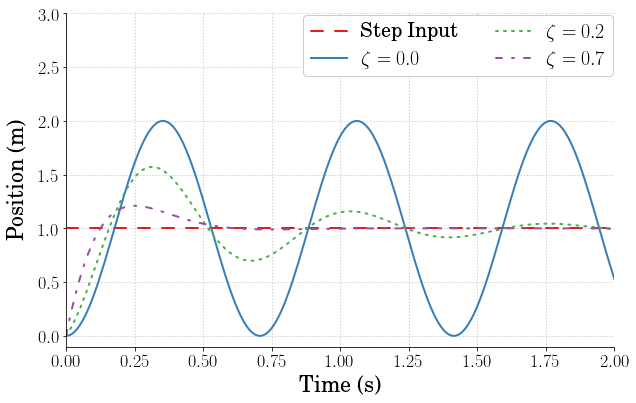

In [6]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(), family='serif', fontsize=18)
plt.setp(ax.get_xmajorticklabels(), family='serif', fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Position (m)', family='serif', fontsize=22, weight='bold', labelpad=10)

plt.plot([t[0], t[-1]], [y_step, y_step], linewidth=2, linestyle='--', label=r'Step Input')
plt.plot(t, x_undamped, linewidth=2, linestyle='-', label=r'$\zeta=0.0$')
plt.plot(t, x_0p2, linewidth=2, linestyle=':', label=r'$\zeta=0.2$')
plt.plot(t, x_0p7, linewidth=2, linestyle='-.', label=r'$\zeta=0.7$')

# uncomment below and set limits if needed
plt.xlim(0, 2)
plt.ylim(-0.1, 3.0)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 2, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext, family='serif', fontsize=20)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# Uncommetn to save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('MCHE485_Midterm1_Prob1e_Spring2019.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

## Problem 2
The system in Figure 2 consists of a point mass, $m$, attached to the end of a massless, inextensible link of total length $3l$. The link is attached to a perfect, frictionless pin. A spring with spring constant $k_1$ is attached at a distance of $l$ from the pin. Another spring of spring constant $k_2$ is attached at a distance of $2l$ from the pin. A rotational damper with damping coefficient $c$ acts at the pin joint. The springs are at equilibrium when $\theta = 0$. Gravity can be ignored.

<ol style="list-style-type: lower-alpha;">
	<li> Write the equations of motion for this system. (<em>Hint</em>: A rotational damper follows the same form as a linear one, but acts on angular velocity rather than linear.)</li>
	<li> Assuming small angles about the $\theta_{eq} = 0$ equilibrium, write the linearized equations of motion</li>
	<li> What is the natural frequency?</li> 
	<li> What is the damping ratio?</li>
	<li> Assuming $f(t)=0$, sketch the response, $\theta(t)$, initial conditions:
			$$\theta(0) = 0 \quad \mbox{and} \quad  \dot{\theta}(0) = \dot{\theta}_0$$
		 for damping ratios of $\zeta = 0.0$, $\zeta = 0.2$, and $\zeta = 0.7$. Be sure to clearly label the axes and differentiate between the responses.</li>
	<li> Now, assuming that $f(t) = \bar{f}e^{i\omega t}$, write the transfer function from the amplitude of the input, $\bar{f}$, to the amplitude of the response.</li>
	<li> Sketch the approximate frequency response (both magnitude and phase) to the same input for $\zeta = 0.0, \zeta = 0.2\mbox{, and }\zeta = 0.7$. For each damping ratio, be sure to indicate:
		<ol style="list-style-type: lower-roman;">
			<li> Amplitude and phase as $\omega$ approaches 0.</li>
			<li> Amplitude and phase as $\omega$ approaches infinity.</li>
			<li> Amplitude and phase when $\omega$ equals the natural frequency of the system, $\omega_n$.</li>
		</ol>
        </li>
</ol>


<p style="text-align:center">
	<img src="http://shared.crawlab.org/Forced_Horiz_Bar.png" alt="A Spring-supported Rotating Link" width=75%/></a><br>
    <strong> Figure 2: A Spring-supported Rotating Link</strong>
</p>

### Part a
The equation of motion for this system can be written as:
    
$ \quad I_O \ddot{\theta} + c \dot{\theta} + 5 k l^2\cos\theta\sin\theta = 3 f l \cos\theta $

or, dividing by $I_O$:

$ \quad \ddot{\theta} + \frac{c}{I_O} \dot{\theta} + \frac{5 k l^2}{I_O}\cos\theta\sin\theta = \frac{3 f l}{I_O} \cos\theta $

where $I_O$ is the moment of interia of the system about point $O$, $I_O = m(3l)^2$.

### Part b
We can linearize by assuming small angles of oscillation about $\theta_{eq}$ = 0$, such that $\sin\theta \approx \theta$ and $\cos\theta \approx 1$. This gives the linearized equations of motion:

$ \quad I_O \ddot{\theta} + c \dot{\theta} + 5 k l^2\theta = 3 f l $

or dividing by $I_O$:

$ \quad \ddot{\theta} + \frac{c}{I_O} \dot{\theta} + \frac{5 k l^2}{I_O}\theta = \frac{3 f l}{I_O} $

### Part c
To find the natural frequency, match terms in the linearized equation of motion to:

$ \quad \ddot{\theta} + 2\zeta\omega_n \dot{\theta} + \omega_n^2\theta = \frac{3 f l}{I_O} $

Doing this,

$ \quad \omega_n^2 = \frac{5 k l^2}{I_O} $

so

$ \quad \omega_n = \sqrt{\frac{5 k l^2}{I_O}} = \sqrt{\frac{5k}{9l}}$

### Part d
To find the damping ratio, do the same:

$ \quad 2 \zeta \omega_n = \frac{c}{I_O} $

so

$ \quad \zeta = \frac{c}{2 I_O \omega_n} $

### Part e
The free vibration response (to initial conditions) for the underdamped case is:

$ \quad \theta(t) = e^{-\zeta\omega_nt}\left(a \cos{\omega_d t} + b \sin{\omega_d t}\right) $

where $\omega_d = \omega_n \sqrt{1 - \zeta^2}$ is the damped natural frequency.

Using the initial conditions $\theta(0) = 0$ and $\dot{\theta}(0) = \dot{\theta}_0$ to solve for the constants $a$ and $b$, the response to those initial conditions is:

$ \quad \theta(t) = e^{-\zeta\omega_nt}\left(\frac{\dot{\theta}}{\omega_d} \sin{\omega_d t}\right) $

In [7]:
# Define the System Parameters that are constant for all plots
m = 1.0                             # kg
l = 1.0                             # l parameter from problem
I = m * (3*l)**2                    # Moment of inertia about point O

k = (2 * np.pi)**2 * 9/5                 # N/m (Selected to give an undamped natrual frequency of 1Hz)

wn = np.sqrt(5 * k / (9 * m))       # Natural Frequency (rad/s)

# Define the time array
t = np.linspace(0, 3, 301)          # 0-3s with 301 points in between

# Define the theta_dot initial condition
theta_dot_init = np.deg2rad(10)

In [8]:
# The undamped (z=0) case
z = 0.0                       # Define a desired damping ratio
wd = wn * np.sqrt(1 - z**2)     # Damped natural frequency (rad/s)

# Define x(t)
theta_undamped = np.exp(-z * wn * t) * (theta_dot_init / wd * np.sin(wd * t))


# The z=0.2 case
z = 0.2                       # Define a desired damping ratio
wd = wn * np.sqrt(1 - z**2)     # Damped natural frequency (rad/s)

# Define x(t)
theta_0p2 = np.exp(-z * wn * t) * (theta_dot_init / wd * np.sin(wd * t))


# The z=0.7 case
z = 0.7                     # Define a desired damping ratio
wd = wn * np.sqrt(1 - z**2)     # Damped natural frequency (rad/s)

# Define x(t)
theta_0p7 = np.exp(-z * wn * t) * (theta_dot_init / wd * np.sin(wd * t))

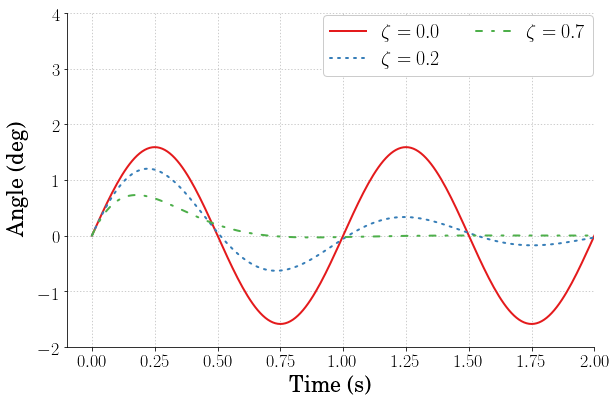

In [9]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(), family='serif', fontsize=18)
plt.setp(ax.get_xmajorticklabels(), family='serif', fontsize=18)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Angle (deg)', family='serif', fontsize=22, weight='bold', labelpad=10)

plt.plot(t, np.rad2deg(theta_undamped), linewidth=2, linestyle='-', label=r'$\zeta=0.0$')
plt.plot(t, np.rad2deg(theta_0p2), linewidth=2, linestyle=':', label=r'$\zeta=0.2$')
plt.plot(t, np.rad2deg(theta_0p7), linewidth=2, linestyle='-.', label=r'$\zeta=0.7$')

# uncomment below and set limits if needed
plt.xlim(-0.1, 2)
plt.ylim(-2, 4.0)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 2, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext, family='serif', fontsize=20)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# Uncommetn to save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('MCHE485_Midterm1_Prob2e_Spring2019.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

### Part f

In [10]:
# Define the magnitude of the force
f_bar = 1.0  # N

# Now, let's define the scaling of the numerator term, so that we don't have to type it each time
numerator = 3 * l * f_bar / I

# Set up input parameters
wun = np.linspace(0, 5, 500)          # Frequency range for freq response plot, 0-4 Omega with 500 points in-between
w = np.linspace(0, 5, 500)            # Frequency range for freq response plot, 0-4 Omega with 500 points in-between

# Let's examine a few different damping ratios
z = 0.0
mag_un = numerator / (np.sqrt((1 - w**2)**2 + (2 * z * w)**2))
phase_un = np.rad2deg(-np.arctan2((2 * z * w), (1 - w**2)))

# Let's mask the phase discontinuity, so it isn't plotted
pos = np.where(np.abs(mag_un) >= 25)
phase_un[pos] = np.nan
wun[pos] = np.nan

z = 0.2
mag_0p2 = numerator / (np.sqrt((1 - w**2)**2 + (2 * z * w)**2))
phase_0p2 = np.rad2deg(-np.arctan2((2 * z * w), (1 - w**2)))


z = 0.7
mag_0p7 = numerator / (np.sqrt((1 - w**2)**2 + (2 * z * w)**2))
phase_0p7 = np.rad2deg(-np.arctan2((2 * z * w), (1 - w**2)))

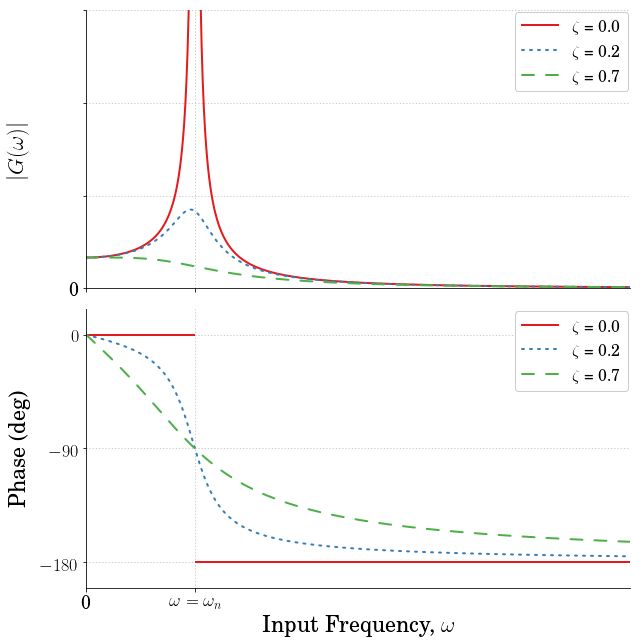

In [11]:
# Let's plot the magnitude and phase as subplots, to make it easier to compare

# Make the figure pretty, then plot the results
#   "pretty" parameters selected based on pdf output, not screen output
#   Many of these setting could also be made default by the .matplotlibrc file
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(8,8))

plt.subplots_adjust(bottom=0.12,left=0.17,top=0.96,right=0.96)
plt.setp(ax.get_ymajorticklabels(),family='serif',fontsize=18)
plt.setp(ax.get_xmajorticklabels(),family='serif',fontsize=18)

ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')
ax1.grid(True,linestyle=':',color='0.75')
ax1.set_axisbelow(True)

ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')
ax2.grid(True,linestyle=':',color='0.75')
ax2.set_axisbelow(True)

plt.xlabel(r'Input Frequency, $\omega$',family='serif',fontsize=22,weight='bold',labelpad=5)
ax1.set_xlim(0.0,5.0)
plt.xticks([0,1],['0','$\omega = \omega_n$'])

# Magnitude plot
ax1.set_ylabel(r'$ |G(\omega)| $',family='serif',fontsize=22,weight='bold',labelpad=40)
ax1.plot(wun, mag_un, linewidth=2, label=r'$\zeta$ = 0.0')
ax1.plot(w, mag_0p2, linewidth=2, linestyle = ':', label=r'$\zeta$ = 0.2')
ax1.plot(w, mag_0p7, linewidth=2, linestyle = '--',label=r'$\zeta$ = 0.7')
ax1.set_ylim(0.0, 3.0)
ax1.set_yticks([0,1,2,3])
ax1.set_yticklabels(['0', '', '', ''])


ax1.leg = ax1.legend(loc='upper right', fancybox=True)
ltext  = ax1.leg.get_texts()
plt.setp(ltext,family='Serif',fontsize=16)

# Phase plot 
ax2.set_ylabel(r'Phase (deg)',family='serif',fontsize=22,weight='bold',labelpad=10)
# ax2.plot(wnorm,TFnorm_phase*180/np.pi,linewidth=2)
ax2.plot(wun, phase_un, linewidth=2, label=r'$\zeta$ = 0.0')
ax2.plot(w, phase_0p2, linewidth=2, linestyle = ':', label=r'$\zeta$ = 0.2')
ax2.plot(w, phase_0p7, linewidth=2, linestyle = '--', label=r'$\zeta$ = 0.7')
ax2.set_ylim(-200.0,20.0,)
ax2.set_yticks([0, -90, -180])

ax2.leg = ax2.legend(loc='upper right', fancybox=True)
ltext  = ax2.leg.get_texts()
plt.setp(ltext,family='serif',fontsize=16)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# If you want to save the figure, uncomment the commands below. 
# The figure will be saved in the same directory as your IPython notebook.
# Save the figure as a high-res pdf in the current folder
# plt.savefig('MCHE485_Midterm1_Prob2g_Spring2019.pdf')

fig.set_size_inches(9,9) # Resize the figure for better display in the notebook

## Problem 3
The system in Figure 3 is a sketch of a disk of radius $r_2$. It is connected to ground via a perfect, frictionless pin at point $O$. There is a spring of stiffness $k$ attached to outer rim of the disk. The other end of the spring is controlled by input $y(t)$. A damper of damping coefficient $c$ is attached between the inner rim, which has radius $r_1$, and ground. You can ignore any gravitational effects and assume that the spring is at its equilibrium when $\theta = 0$ and $y(t)=0$. The disk's moment of inertia about the pin is $I_O$.

<ol style="list-style-type: lower-alpha;">
	<li> Write the linearized equations of motion for this system.</li>
	<li> What is the natural frequency?</li>
	<li> What is the damping ratio?</li>
	<li> Assuming $y(t) = \bar{y}\sin{\omega t}$, write the time response of the angle of the disk, $\theta(t)$.</li>
	<li> Sketch the approximate frequency response of this system (both magnitude and phase) for $\zeta = 0.0, \zeta = 0.2\mbox{, and }\zeta = 0.7$. For each damping ratio, be sure to indicate:
		<ol style="list-style-type: lower-roman;">
			<li> Amplitude and phase as $\omega$ approaches 0.</li>
			<li> Amplitude and phase as $\omega$ approaches infinity.</li>
			<li> Amplitude and phase when $\omega$ equals the natural frequency of the system, $\omega_n$.</li>
		<ol style="list-style-type: lower-roman;">
    </li>
</ol>

<p style="text-align:center">
	<img src="http://shared.crawlab.org/DiskSpringDamper.png" alt="A Disk-spring-damper System" width=60%/></a><br>
    <strong> Figure 3: A Disk-spring-damper System</strong>
</p>

Please see the solutions on the [class website](http://www.ucs.louisiana.edu/~jev9637/MCHE485.html) for the details of this problem.

<hr style="border: 0px;
        height: 1px;
        text-align: center;
        background: #333;
        background-image: -webkit-linear-gradient(left, #ccc, #333, #ccc); 
        background-image:    -moz-linear-gradient(left, #ccc, #333, #ccc); 
        background-image:     -ms-linear-gradient(left, #ccc, #333, #ccc); 
        background-image:      -o-linear-gradient(left, #ccc, #333, #ccc);">

#### Licenses
Code is licensed under a 3-clause BSD style license. See the licenses/LICENSE.md file.

Other content is provided under a [Creative Commons Attribution-NonCommercial 4.0 International License](http://creativecommons.org/licenses/by-nc/4.0/), CC-BY-NC 4.0.

In [12]:
# This cell will just improve the styling of the notebook
# You can ignore it, if you are okay with the default sytling
from IPython.core.display import HTML
import urllib.request
response = urllib.request.urlopen("https://cl.ly/1B1y452Z1d35")
HTML(response.read().decode("utf-8"))